In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torch.utils.data import DataLoader, TensorDataset, random_split
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

#import data from file
housing_data = pd.read_csv('HousingData.csv')

print("\n ----------Top-5- Record----------")
print(housing_data.head(5))
print("\n -----------Information-----------")
print(housing_data.info())
print("\n -----------Data Types-----------")
print(housing_data.dtypes)
print("\n ----------Missing value-----------")
print(housing_data.isnull().sum())
print("\n ----------Null value-----------")
print(housing_data.isna().sum())
print("\n ----------Shape of Data----------")
print(housing_data.shape)


 ----------Top-5- Record----------
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  

 -----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3

In [3]:
# Number of each type of column
housing_data.dtypes.value_counts()

float64    12
int64       2
dtype: int64

In [4]:
print("\n ----------Number of duplicates----------")
print('Number of duplicates:', len(housing_data[housing_data.duplicated()]))


 ----------Number of duplicates----------
Number of duplicates: 0


In [5]:
# Let's now look at the number of unique entries in each of the object (categorical) columns
housing_data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Series([], dtype: float64)

In [6]:
#Let's view a summary of some statistical numbers
housing_data.describe(include = 'all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_data1 = missing_values_table(housing_data)
print(missing_values_data1.head(30))

Your selected dataframe has 14 columns.
There are 6 columns that have missing values.
       Missing Values  % of Total Values
CRIM               20                4.0
ZN                 20                4.0
INDUS              20                4.0
CHAS               20                4.0
AGE                20                4.0
LSTAT              20                4.0


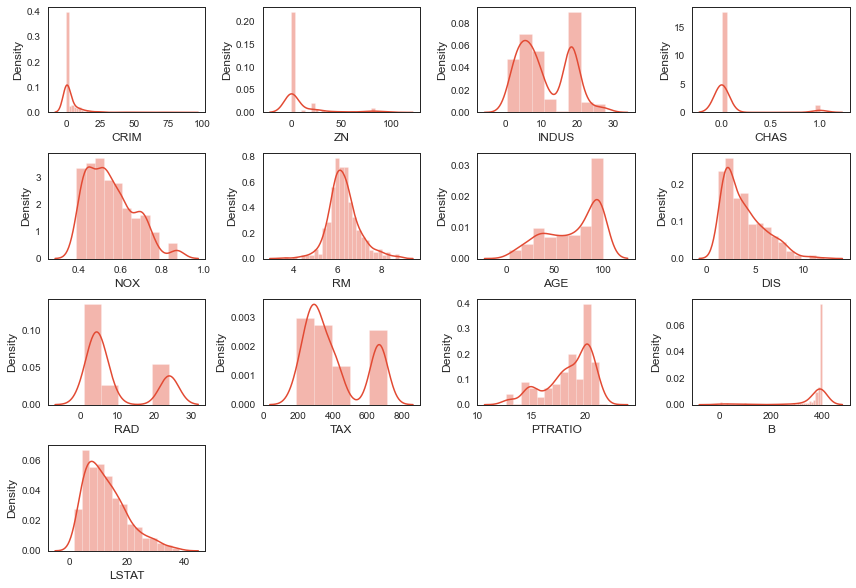

In [8]:
housing_data.dropna(inplace = True)
#Distribution of numerical values
num_attributes = housing_data.select_dtypes(exclude='object').drop('MEDV', axis=1).copy()

fig = plt.figure(figsize=(12,18))
for i in range(len(num_attributes.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(num_attributes.iloc[:,i].dropna())
    plt.xlabel(num_attributes.columns[i])

plt.tight_layout()
plt.show()

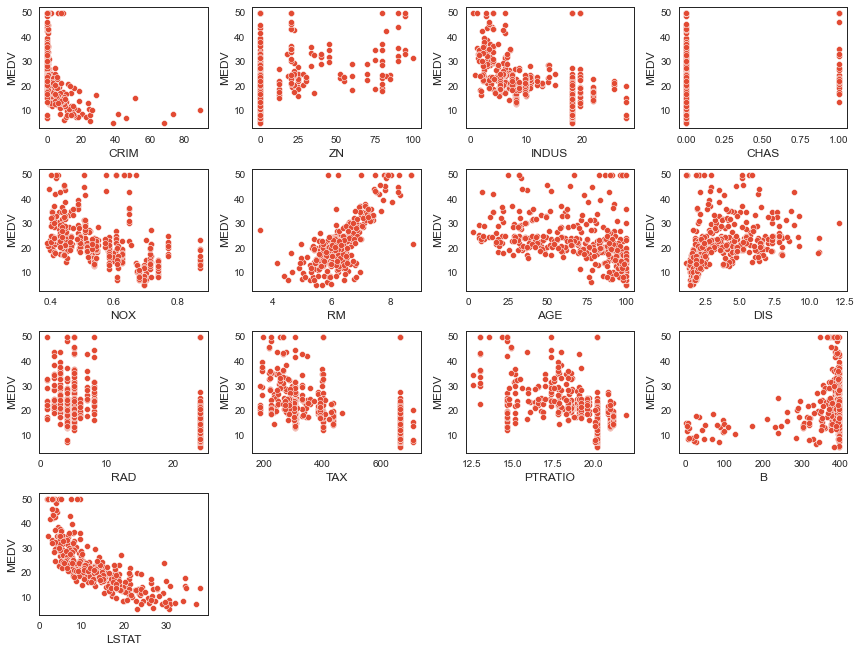

In [9]:
#First look on outliers
target = housing_data.MEDV
f = plt.figure(figsize=(12,20))

for i in range(len(num_attributes.columns)):
    f.add_subplot(9, 4, i+1)
    sns.scatterplot(num_attributes.iloc[:,i], target)
    
plt.tight_layout()
plt.show()

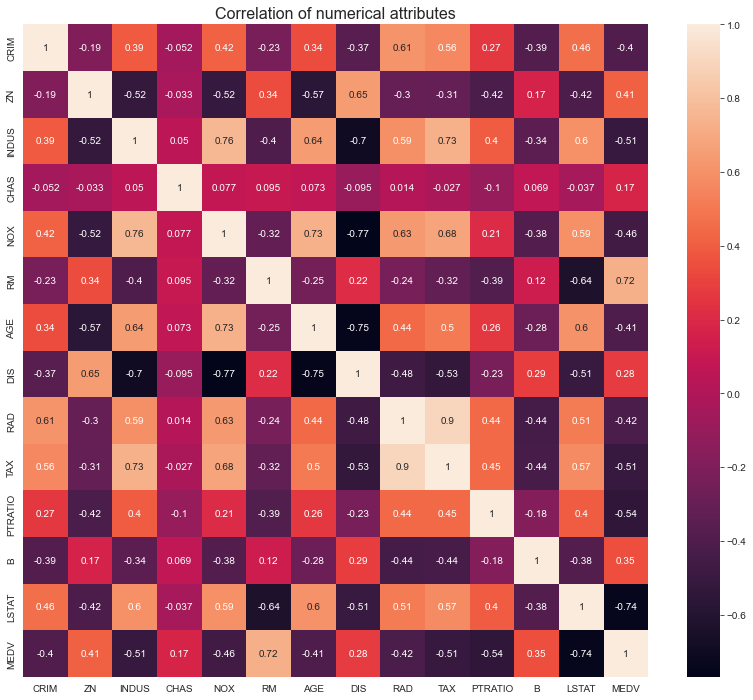

In [10]:
#Coreelation of attribues
correlation = housing_data.corr()

f, ax = plt.subplots(figsize=(14,12))
plt.title('Correlation of numerical attributes', size=16)
#sns.heatmap(correlation)
sns.heatmap(correlation, annot=True)
plt.show()

In [11]:
#Correlation of values to target
correlation['MEDV'].sort_values(ascending=False).head(15)

MEDV       1.000000
RM         0.723951
ZN         0.406822
B          0.347256
DIS        0.279547
CHAS       0.173701
CRIM      -0.397230
AGE       -0.407470
RAD       -0.416638
NOX       -0.459054
TAX       -0.508864
INDUS     -0.510829
PTRATIO   -0.543809
LSTAT     -0.743450
Name: MEDV, dtype: float64

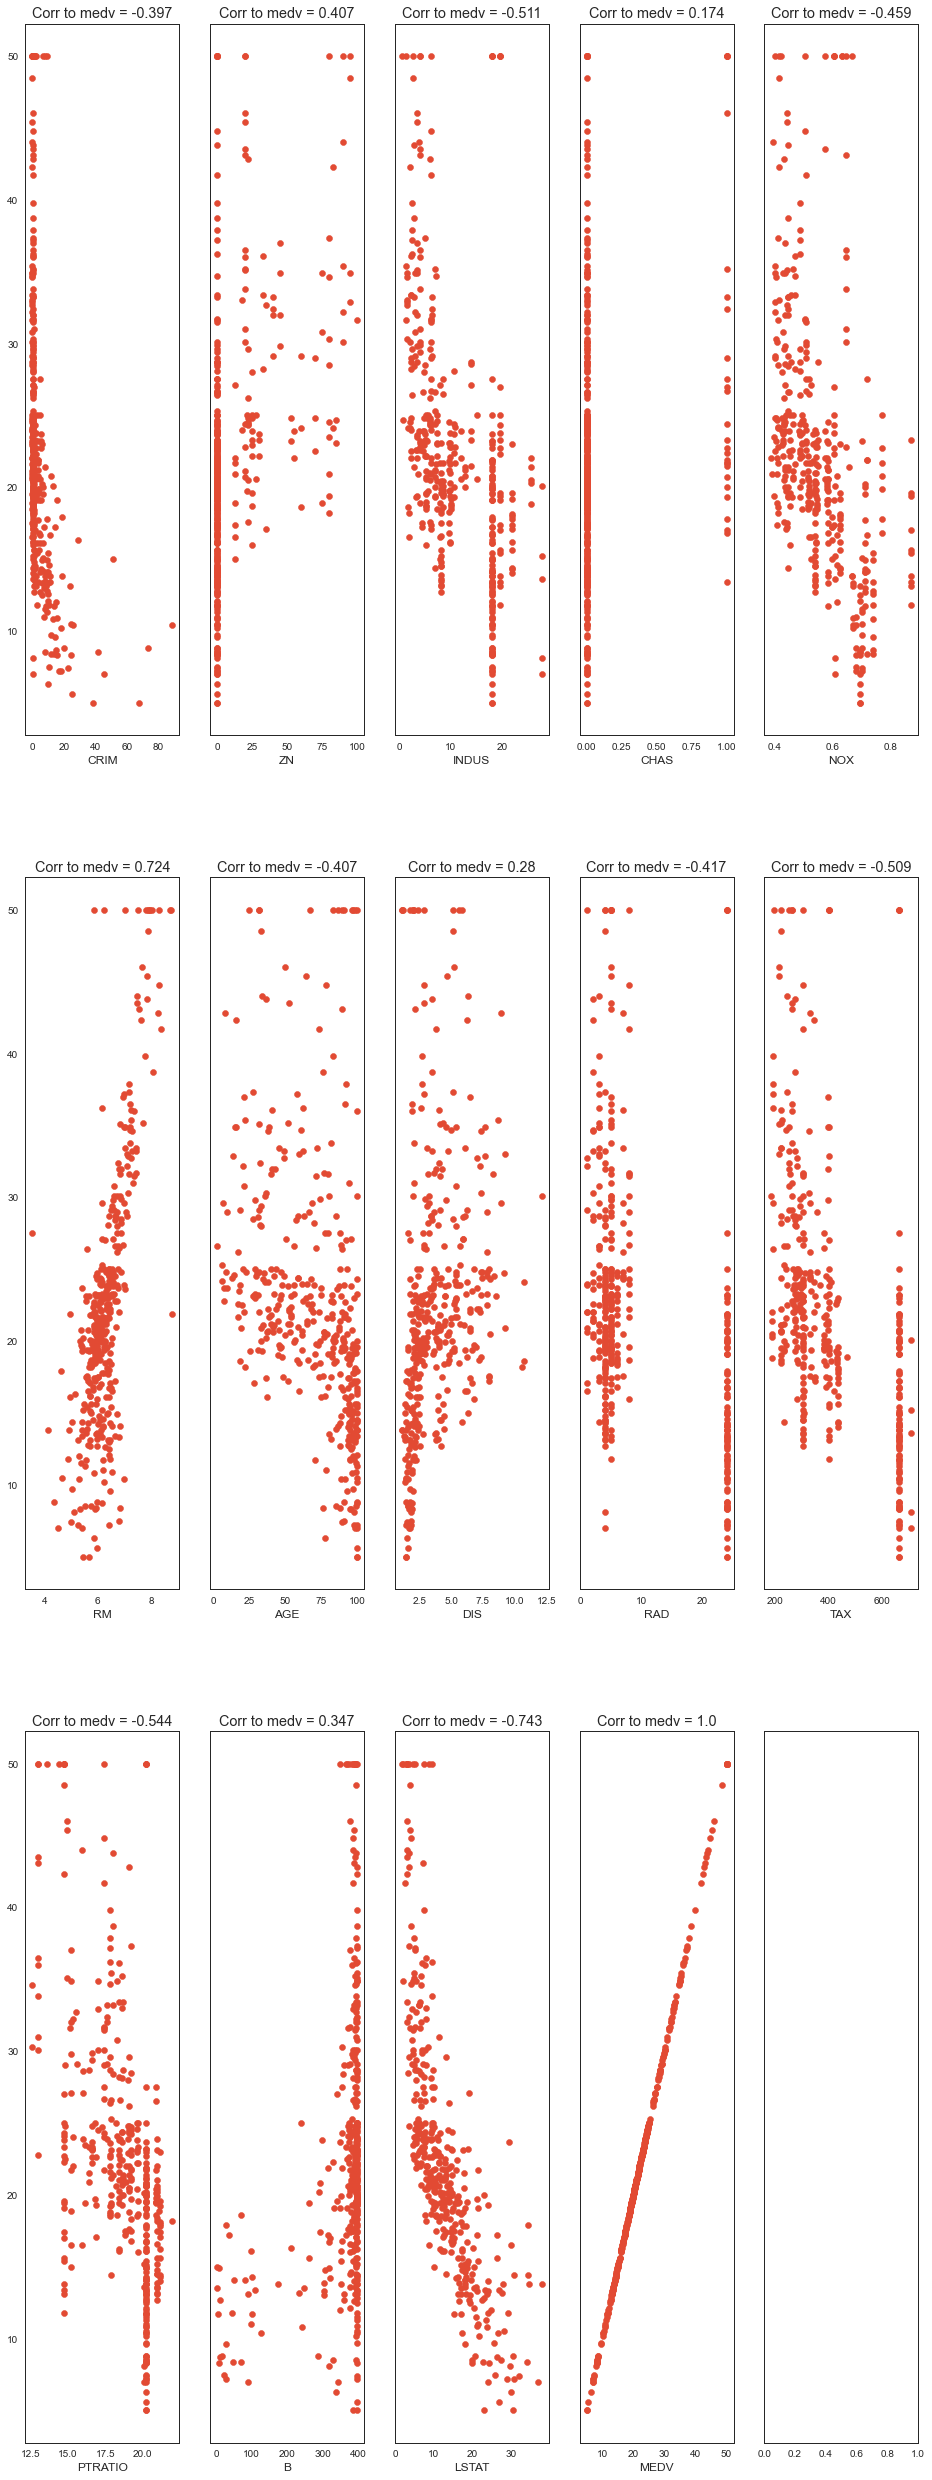

In [12]:
#Show scatter again with correlation value
#We want to remove feauters that have high correlation to eachother
#and features that have low correlation with the target
num_columns = housing_data.select_dtypes(exclude='object').columns
corr_to_price = correlation['MEDV']
n_cols = 5
n_rows = 3
fig, ax_arr = plt.subplots(n_rows, n_cols, figsize=(16,20), sharey=True)
plt.subplots_adjust(bottom=-0.8)
for j in range(n_rows):
    for i in range(n_cols):
        plt.sca(ax_arr[j, i])
        index = i + j*n_cols
        if index < len(num_columns):
            plt.scatter(housing_data[num_columns[index]], housing_data.MEDV)
            plt.xlabel(num_columns[index])
            plt.title('Corr to medv = '+ str(np.around(corr_to_price[index], decimals=3)))
plt.show()

In [13]:
housing_data.values

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [4.5270e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 9.0800e+00,
        2.0600e+01],
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01]])

In [18]:
housing_features = ['CRIM', 'ZN', 'INDUS','NOX', 'RM', 'AGE', 'DIS' , 'TAX' , 'PTRATIO', 'B', 'LSTAT']
X = housing_data[housing_features]

#Prediction Target
y = housing_data["MEDV"]

inputs = X.values
targets = y.values
inputs.shape,targets.shape

((394, 11), (394,))

In [22]:
# Hyperparameters
batch_size=64
learning_rate=5e-7
input_size=11
output_size=1

# Convert to PyTorch dataset
dataset = TensorDataset(torch.tensor(inputs, dtype=torch.float32), torch.tensor(targets, dtype=torch.float32))
train_ds, val_ds = random_split(dataset, [300, 94])

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size*2)

In [23]:
inputs

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [4.5270e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        9.0800e+00],
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00]])

In [24]:
class HousingModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, xb):
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        out = self(inputs)                 # Generate predictions
        loss = F.mse_loss(out, targets)    # Calculate loss
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch 
        out = self(inputs)                 # Generate predictions
        loss = F.mse_loss(out, targets)    # Calculate loss
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}".format(epoch, result['val_loss']))
    
model = HousingModel()

In [25]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [26]:
result = evaluate(model, val_loader)
result

{'val_loss': 14370.236328125}

In [32]:
history = fit(10, learning_rate, model, train_loader, val_loader)

Epoch [0], val_loss: 104.4212
Epoch [1], val_loss: 105.4018
Epoch [2], val_loss: 104.2848
Epoch [3], val_loss: 101.9323
Epoch [4], val_loss: 101.9574
Epoch [5], val_loss: 103.1179
Epoch [6], val_loss: 101.6275
Epoch [7], val_loss: 103.8653
Epoch [8], val_loss: 102.1201
Epoch [9], val_loss: 100.3386


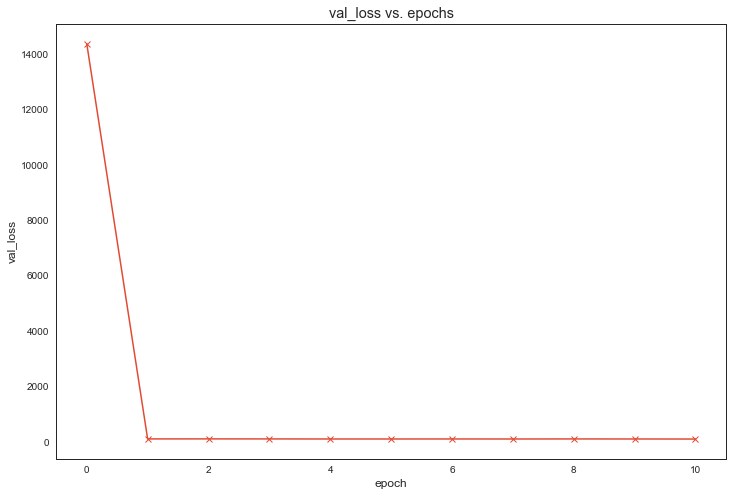

In [33]:
losses = [r['val_loss'] for r in [result] + history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.title('val_loss vs. epochs');

In [29]:
def predict_single(x, model):
    xb = x.unsqueeze(0)
    return model(x).item()

In [34]:
x, target = val_ds[10]
pred = predict_single(x, model)
print("Input: ", x)
print("Target: ", target.item())
print("Prediction:", pred)

Input:  tensor([  1.3880,   0.0000,   8.1400,   0.5380,   5.9500,  82.0000,   3.9900,
        307.0000,  21.0000, 232.6000,  27.7100])
Target:  13.199999809265137
Prediction: 19.420169830322266


In [31]:
torch.save(model.state_dict(), 'housing-linear.pth')